In [188]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [189]:
dataset = pd.read_csv('./datasets/data.csv').drop(['BandGapWidth'], axis=1)
dataset.CondensedBinary2DGeometry = dataset.CondensedBinary2DGeometry.apply(int).apply(str).apply(int, args=(2,))
#print([type(x) for x in dataset.columns])
dataset = dataset.iloc[0:500]
print(dataset.info())
dataset.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CondensedBinary2DGeometry  500 non-null    int64  
 1   BandGapLocation            500 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 7.9 KB
None


,CondensedBinary2DGeometry,BandGapLocation
0,2,497.011658
1,3,467.929018
2,4,687.636705
3,5,721.282777
4,6,464.347767


In [190]:
X = dataset.loc[:, ['CondensedBinary2DGeometry']].values
y = dataset.loc[:, ['BandGapLocation']].values
print ("Матрица признаков"); print(X[:5])
print ("Зависимая переменная"); print(y[:5])

Матрица признаков
[[2]
 [3]
 [4]
 [5]
 [6]]
Зависимая переменная
[[497.0116577]
 [467.9290183]
 [687.6367054]
 [721.2827768]
 [464.3477675]]


In [191]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/4, random_state = 0) 

In [192]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)
# X_train = np.concatenate((X_train, X_train), axis=0)
# X_train

LinearRegression()

In [196]:
y_pred = regressor.predict(X_test)
y_pred

array([[844.97975707],
       [888.62704303],
       [895.95842309],
       [939.77620625],
       [943.86813931],
       [827.930036  ],
       [906.87024458],
       [950.85852495],
       [863.05246141],
       [860.66550046],
       [885.89908765],
       [887.77455697],
       [926.64792102],
       [897.6633952 ],
       [865.09842794],
       [912.49665253],
       [945.57311142],
       [919.14604375],
       [861.3474893 ],
       [833.21544953],
       [876.18074664],
       [921.19201028],
       [885.72859044],
       [849.24218734],
       [835.77290769],
       [937.55974251],
       [829.80550531],
       [921.36250749],
       [846.85522639],
       [883.85312112],
       [935.00228435],
       [852.31113713],
       [853.50461761],
       [871.74781916],
       [923.57897123],
       [951.37001658],
       [902.94880873],
       [940.79918952],
       [918.63455212],
       [885.38759602],
       [908.91621111],
       [835.9434049 ],
       [929.71687082],
       [880

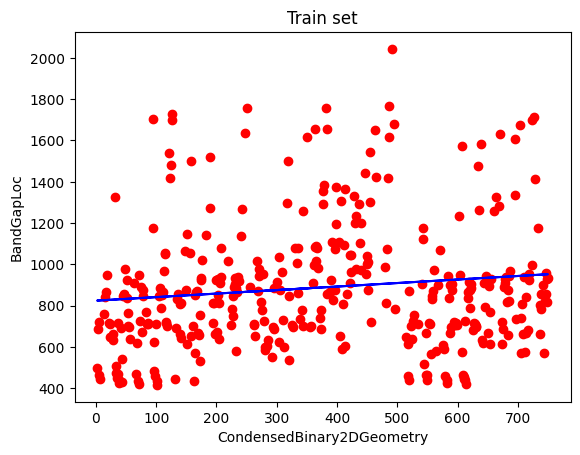

In [197]:
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Train set')
plt.xlabel('CondensedBinary2DGeometry')
plt.ylabel('BandGapLoc')
plt.show()

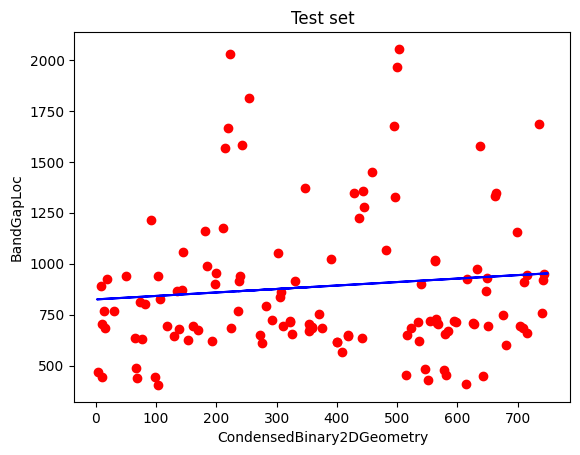

In [194]:
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Test set')
plt.xlabel('CondensedBinary2DGeometry')
plt.ylabel('BandGapLoc')
plt.show()

In [195]:
print(regressor.predict([[300]]))

[[875.83975222]]


In [217]:
err = 0
for i in range(len(X_test)):
    err += (y_pred[i] - y_test[i]) ** 2


print(err[0])

15263686.186711695


## Контрольные вопросы

- Почему при реализации линейной модели регрессии нет необходимости выполнять масштабирование признаков?


**Ответ**: В линейной регрессии масштабирование признаков не обязательно, потому что коэффициенты регрессии компенсируют масштабирование. Масштабирование может помочь ускорить обучение, но не является обязательным.


- Почему при реализации модели линейной регрессии в качестве функции потерь используется квадратичное отклонение, а не модуль отклонения?


**Ответ**: Квадратичную функцию легче оптимизировать.


- Что именно реализовано в методе fit(X, y) класса LinearRegression?


**Ответ**: Метод подбирает оптимальные коэффициенты регрессии, чтобы минимизировать функцию потерь на обучающих данных X (признаки) и y (целевая функция).


- Поясните назначение метода predict класса LinearRegression.


**Ответ**: Этот метод ннужен для предсказания знацения целевой функции на множестве X, используя полученные в результате обучения коэффиценты регрессии.


- По какой подвыборке необходимо оценивать точность модели машинного обучения: тестовой или тренировочной?


**Ответ**: Тестовой

